Zadanie:

 Przeprowadziliśmy ankietę mającą zbadać cechy psychologiczne polskich internautów. Na wynik badania składają się dwa pliki:

1. users.csv - dane demograficzne ankietowanych oraz przeglądarka z jakiej korzystają.

2. personality.csv - profil psychologiczny ankietowanych, opisany przez 5 cech: A-E.

 
Opis cech demograficznych:

·       D01 Płeć

·       D02 Rok urodzenia

·       D03 Wykształcenie - podstawowe, zawodowe, średnie, wyższe

·       D04 Status zawodowy

·       D05 Wielkość miejscowości - wieś, do 20k, do 100k, do 500k, powyżej

·       D06 Sytuacja finansowa

·       D07 Rozmiar gospodarstwa domowego

 
Szukamy odpowiedzi na następujące pytania:

1. Czy istnieje związek pomiędzy posiadanymi przez nas informacjami o ankietowanych, a ich profilem psychologicznym?

2. Czy możemy podzielić ankietowanych na grupy osób o podobnym profilu psychologicznym? Jakie to grupy, co wyróżnia każdą z nich, jaka jest ich charakterystyka demograficzna?

 
Przeprowadź odpowiednią analizę danych. Przygotuj krótkie, wysokopoziomowe podsumowanie managementu oraz paczkę z kodem pozwalającym na odtworzenie najważniejszych wyników oraz dalszy rozwój rozwiązań 

## Exploratory Data Analysis

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import eda

In [3]:
users_df = pd.read_csv('data/users.csv')
personality_df = pd.read_csv('data/personality.csv')

In [4]:
users_df.head()

,UserIdentifier,UserBrowser,D01,D02,D03,D04,D05,D06,D07
0,d2d10f362bb1d0092174a660778cbe50,Firefox 69.0 (Desktop),M,1954.0,3.0,4.0,2.0,6.0,2.0
1,083a56a91d0d1ee4e66643849133b2b3,Chrome 70.0.3538.110 (Mobile),M,1963.0,2.0,2.0,2.0,7.0,2.0
2,fdc1004b329f2aca4c81ad59c93c1be0,Chrome 77.0.3865.90 (Desktop),K,1975.0,4.0,1.0,4.0,5.0,6.0
3,8b8a4372a0f3fd3e1a1d4c531211506e,Chrome 75.0.3770.142 (Desktop),K,1991.0,3.0,2.0,4.0,5.0,4.0
4,58d0c701bf73a5949e2ee29f387fb5a2,Chrome 78.0.3904.108 (Mobile),M,2000.0,3.0,3.0,1.0,7.0,6.0


In [5]:
personality_df.head()

,UserIdentifier,A,B,C,D,E
0,d2d10f362bb1d0092174a660778cbe50,0.041197,-0.389188,-0.257404,0.732678,-0.769127
1,083a56a91d0d1ee4e66643849133b2b3,-0.596461,0.620304,-0.611045,-0.256928,-0.244441
2,fdc1004b329f2aca4c81ad59c93c1be0,-1.198166,-0.821102,0.298394,-0.031738,0.821793
3,8b8a4372a0f3fd3e1a1d4c531211506e,-0.344910,-1.611630,0.220709,-0.323851,-0.127276
4,58d0c701bf73a5949e2ee29f387fb5a2,-0.365047,1.094319,-0.187957,-0.254589,0.554409


### first let's get rid of duplicated entries

In [6]:
print(f"there were {users_df.shape[0] - users_df.drop_duplicates().shape[0]} duplicated user entries" )
print(f"there were {personality_df.shape[0] - personality_df.drop_duplicates().shape[0]} duplicated personality entries" )

users_df = users_df.drop_duplicates()
personality_df = personality_df.drop_duplicates()

there were 187 duplicated user entries
there were 152 duplicated personality entries


# Data cleaning

### 1. Split 'UserBrowser' into many columns: 'Browser', 'Version', 'Device'

In [7]:
users_df[['Browser', 'Version', 'Device']] = users_df.UserBrowser.apply(lambda row: pd.Series(row.split(" ")))
users_df.Device = users_df.Device.apply(lambda row: row.strip('()'))
users_df.drop('UserBrowser', axis=1, inplace=True)
users_df.head()

,UserIdentifier,D01,D02,D03,D04,D05,D06,D07,Browser,Version,Device
0,d2d10f362bb1d0092174a660778cbe50,M,1954.0,3.0,4.0,2.0,6.0,2.0,Firefox,69.0,Desktop
1,083a56a91d0d1ee4e66643849133b2b3,M,1963.0,2.0,2.0,2.0,7.0,2.0,Chrome,70.0.3538.110,Mobile
2,fdc1004b329f2aca4c81ad59c93c1be0,K,1975.0,4.0,1.0,4.0,5.0,6.0,Chrome,77.0.3865.90,Desktop
3,8b8a4372a0f3fd3e1a1d4c531211506e,K,1991.0,3.0,2.0,4.0,5.0,4.0,Chrome,75.0.3770.142,Desktop
4,58d0c701bf73a5949e2ee29f387fb5a2,M,2000.0,3.0,3.0,1.0,7.0,6.0,Chrome,78.0.3904.108,Mobile


### 2 . sex into binary

In [8]:
users_df['Sex'] = users_df['D01'].map({"M":0, "K": 1})

### 3. Change dtypes from 'float64' to 'int16'
(Columns D05-D07 have 'nan' values, hence they are left as float)

In [9]:
users_df.dtypes

UserIdentifier     object
D01                object
D02               float64
D03               float64
D04               float64
D05               float64
D06               float64
D07               float64
Browser            object
Version            object
Device             object
Sex                 int64
dtype: object

In [10]:
users_df = users_df.astype(dtype={'D02':np.int16, 'D03':np.int16, 'D04':np.int16})

#### check for those nan values

In [11]:
col_nan = users_df.isna().sum()
print("Column | %")
col_nan[col_nan > 0.]

Column | %


D05    1
D06    1
D07    1
dtype: int64

In [12]:
users_df[users_df['D05'].isna()]

,UserIdentifier,D01,D02,D03,D04,D05,D06,D07,Browser,Version,Device,Sex
557,afe841be2dababac5a440e0c14a9f903,K,1981,4,2,NaN,NaN,NaN,Chrome,78.0.3904.108,Mobile,1


only one record with unknown information, for simplicity reasons we discard it. However, if the data is scarce it should be filled with i.e. averages ofother columns if applicable

In [13]:
users_df = users_df.dropna()

### 4. Assuming that this data comes from the Polish market, we can divide the year of birth column into generations
source : https://natemat.pl/235903,do-jakiego-pokolenia-naleze-generacja-z-to-najliczniejsza-grupa-w-polsce

![docs/pokolenia.jpg](docs/pokolenia.jpg)

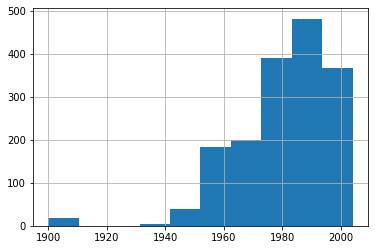

In [14]:
users_df['D02'].hist()

In [15]:
year_of_birth_mapper = {"pokolenie Z": range(1995, 2020),
                       "pokolenie Y": range(1980, 1995),
                       "pokolenie X": range(1964, 1980),
                       "pokolenie BB": range(1946, 1964),
                       "other": range(users_df['D02'].min(), 1946)}

In [16]:
users_df['Generation'] = users_df['D02'].apply(lambda x: next((k for k, v in year_of_birth_mapper.items() if x in v), 0))

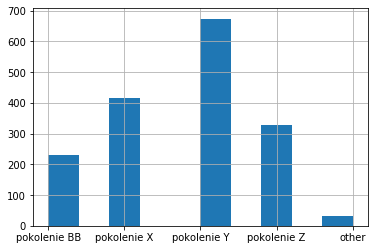

In [17]:
users_df['Generation'].hist()

In [18]:
users_df = users_df.rename(columns = {"D03": "Education", 
                                      "D05": "City size", 
                                      "D04": "Professional status", 
                                     "D06": "Financial_situation",
                                     "D07": "Size of Household"})

In [19]:
users_df = users_df.drop(["D01", "D02"], axis=1)

#### We can assume that the higher the number, the better the financial situation. Also this follows a normal distribution implying the wealth distribution is fairly representative of the population.

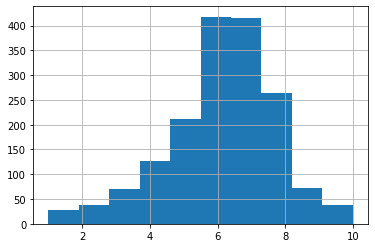

In [20]:
users_df['Financial_situation'].hist()

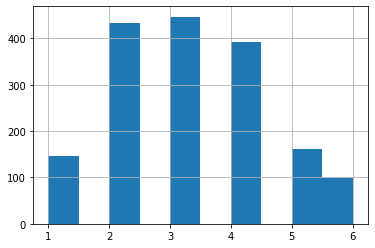

In [21]:
users_df['Size of Household'].hist()

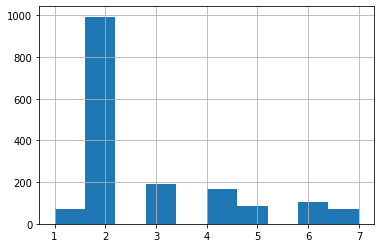

In [22]:
users_df['Professional status'].hist()

In [23]:
users_df.head()

,UserIdentifier,Education,Professional status,City size,Financial_situation,Size of Household,Browser,Version,Device,Sex,Generation
0,d2d10f362bb1d0092174a660778cbe50,3,4,2.0,6.0,2.0,Firefox,69.0,Desktop,0,pokolenie BB
1,083a56a91d0d1ee4e66643849133b2b3,2,2,2.0,7.0,2.0,Chrome,70.0.3538.110,Mobile,0,pokolenie BB
2,fdc1004b329f2aca4c81ad59c93c1be0,4,1,4.0,5.0,6.0,Chrome,77.0.3865.90,Desktop,1,pokolenie X
3,8b8a4372a0f3fd3e1a1d4c531211506e,3,2,4.0,5.0,4.0,Chrome,75.0.3770.142,Desktop,1,pokolenie Y
4,58d0c701bf73a5949e2ee29f387fb5a2,3,3,1.0,7.0,6.0,Chrome,78.0.3904.108,Mobile,0,pokolenie Z


#### end of column preprocessing

# pre-statistical analysis: 
### let's see if we have any duplicates in the form of the same user but with different variable values

In [24]:
f"there are {len(users_df['UserIdentifier'].unique())} unique identifies in the users csv"
f"there are {len(personality_df['UserIdentifier'].unique())} unique identifies in the personality csv"

user_counts = pd.DataFrame(np.unique(users_df['UserIdentifier'], return_counts=True, return_index=False, return_inverse=False)).T
user_counts = user_counts.sort_values(by=1, ascending=False)
user_counts = user_counts[user_counts[1]>1]
user_counts.columns = ['id', 'users']

personality_counts = pd.DataFrame(np.unique(personality_df['UserIdentifier'], return_counts=True, return_index=False, return_inverse=False)).T
personality_counts = personality_counts.sort_values(by=1, ascending=False)
personality_counts = personality_counts[personality_counts[1]>1]
personality_counts.columns = ['id', 'personality']

In [25]:
user_counts

,id,users
805,77f0be1043bff8c9a56eade3b14ae1d3,2
847,8015c0d8fc1e5cacfc646805a107a774,2


In [26]:
personality_counts

,id,personality
737,77f0be1043bff8c9a56eade3b14ae1d3,4
777,8015c0d8fc1e5cacfc646805a107a774,4
1035,a9708dbcb21aa7ccf7ce2de45cf9f206,2
1212,c7f107a928b95df530d54f6e0a5af971,2


#### let's conside only the users that are present in both, since we cannot evaluate anything useful in this task from only information from one table

In [27]:
user_counts.merge(personality_counts, on='id')

,id,users,personality
0,77f0be1043bff8c9a56eade3b14ae1d3,2,4
1,8015c0d8fc1e5cacfc646805a107a774,2,4


In [28]:
user_1 = '77f0be1043bff8c9a56eade3b14ae1d3'
user_2 = '8015c0d8fc1e5cacfc646805a107a774'

So we have two users with a unique user id who have more than one entry. Let's explore why that is the case

In [29]:
users_df[users_df['UserIdentifier']==user_1]

,UserIdentifier,Education,Professional status,City size,Financial_situation,Size of Household,Browser,Version,Device,Sex,Generation
1408,77f0be1043bff8c9a56eade3b14ae1d3,3,2,4.0,10.0,6.0,Edge,18.18362,Desktop,0,pokolenie Y
1409,77f0be1043bff8c9a56eade3b14ae1d3,3,2,4.0,8.0,6.0,Edge,18.18362,Desktop,0,pokolenie Y


In [30]:
users_df[users_df['UserIdentifier']==user_2]

,UserIdentifier,Education,Professional status,City size,Financial_situation,Size of Household,Browser,Version,Device,Sex,Generation
1488,8015c0d8fc1e5cacfc646805a107a774,2,4,1.0,6.0,2.0,Edge,18.18362,Desktop,1,pokolenie X
1489,8015c0d8fc1e5cacfc646805a107a774,2,4,1.0,10.0,2.0,Edge,18.18362,Desktop,1,pokolenie X


### hence we can see that this is because their financial situation has changed, let's see if this had an impact on their personality

In [31]:
personality_df[personality_df['UserIdentifier']==user_1]

,UserIdentifier,A,B,C,D,E
1255,77f0be1043bff8c9a56eade3b14ae1d3,-1.250586,1.679915,-0.005389,-0.549635,-0.251646
1256,77f0be1043bff8c9a56eade3b14ae1d3,-1.795843,0.741011,-0.006315,-0.194033,-0.254256
1257,77f0be1043bff8c9a56eade3b14ae1d3,-1.160114,1.514207,-0.078972,-0.672392,-0.095133
1258,77f0be1043bff8c9a56eade3b14ae1d3,-1.705372,0.575303,-0.079898,-0.316791,-0.097743


In [32]:
personality_df[personality_df['UserIdentifier']==user_2]

,UserIdentifier,A,B,C,D,E
1329,8015c0d8fc1e5cacfc646805a107a774,-3.087869,-0.093816,-0.404177,-0.205214,0.068431
1330,8015c0d8fc1e5cacfc646805a107a774,-3.211284,-0.375528,-0.430127,-0.219763,-0.081141
1331,8015c0d8fc1e5cacfc646805a107a774,-2.980238,-0.096443,-0.124548,-0.221593,0.053838
1332,8015c0d8fc1e5cacfc646805a107a774,-3.103653,-0.378156,-0.150498,-0.236142,-0.095734


## we can see that their psychological profile may differ slightly but due to the size of number of anomalies, we will proceed to drop them from further analysis

In [33]:
users_df = users_df[~users_df['UserIdentifier'].isin([user_1, user_2])]
personality_df = personality_df[~personality_df['UserIdentifier'].isin([user_1, user_2])]

#### personality nan values

In [34]:
nan_per = personality_df.iloc[pd.isnull(personality_df).any(1).nonzero()[0]]
print(nan_per.shape)
nan_per.head()

(37, 6)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


,UserIdentifier,A,B,C,D,E
48,ff7e34757a2f5a556900da8f256caf6c,-1.355529,NaN,-0.670744,-0.641809,0.392482
129,a114937cd1ef612737e1d6e32b167da3,-2.090893,-0.024152,NaN,-0.280436,0.236356
184,385e7c4a548e0cc7430265852959b37c,0.898997,0.973255,1.621190,-0.388284,NaN
186,c87032106f5cced05a9017bb66dc2f6f,0.050791,NaN,0.194658,1.314765,0.604076
190,e384956c34ae245c0260f36cd325c1fa,-1.211774,-0.971555,NaN,0.612637,0.065842


Hence we can fill these values with the column mean

In [35]:
personality_df[['A', 'B', 'C', 'D', 'E']] = personality_df[['A', 'B', 'C', 'D', 'E']].apply(lambda x: x.fillna(x.mean()),axis=0)

In [40]:
personality_df.shape, personality_df.dropna().shape

((1521, 6), (1521, 6))

In [41]:
users_df.shape, users_df.dropna().shape

((1676, 11), (1676, 11))

## Now we can proceed to join the two dataframes


In [45]:
df = personality_df.merge(users_df, on='UserIdentifier')

## et voila, the final dataframe

---------

# column exploration

/Users/ostyk/Desktop/recovery_github/AdEmotion/eda.py:38: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  data_col.value_counts().plot('bar')


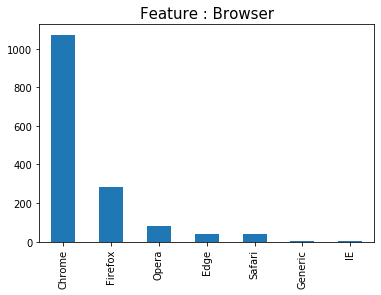

In [48]:
eda.categ_summary(df['Browser'])

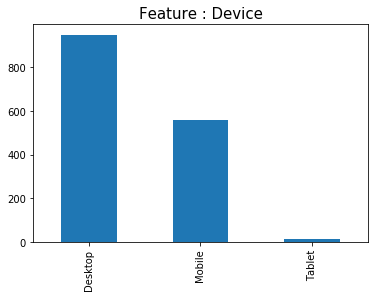

In [49]:
eda.categ_summary(df['Device'])

# Psychological data analysis

### pair plot for personnality data

In [ ]:
df

In [ ]:
personality_df = personality_df.dropna()

In [ ]:
sns.pairplot(personality_df, kind="scatter")

### check for group clusters

#### using t-sne

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib
matplotlib.style.use('ggplot')
import scipy

In [ ]:
tmp_df = personality_df.drop(['UserIdentifier'],axis=1)

In [ ]:
tmp_df = tmp_df.astype(np.float32)
tmp_df = tmp_df.dropna()

In [ ]:
# computing t-SNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=3, perplexity=20, n_iter=1000,learning_rate=250)
tsne_results = tsne.fit_transform(tmp_df)
print ("t-SNE done! Time elapsed: {} seconds".format(time.time()-time_start))

In [ ]:
plt.scatter(tsne_results[:,0], tsne_results[:,1])

# pair plot for correlation check

# however, let's first for duplicates

#### Step 1:  combine these two csv files through joining on the unique UserIdentifier column 

In [ ]:
f"there are {len(users_df['UserIdentifier'].unique())} unique identifies in the users csv"

before joining let's explore users with more than one entry

In [ ]:
user_counts = pd.DataFrame(np.unique(users_df['UserIdentifier'], return_counts=True, return_index=False, return_inverse=False)).T
user_counts = user_counts.sort_values(by=1, ascending=False)
user_counts = user_counts[user_counts[1]>1]

personality_counts = pd.DataFrame(np.unique(personality_df['UserIdentifier'], return_counts=True, return_index=False, return_inverse=False)).T
personality_counts = personality_counts.sort_values(by=1, ascending=False)
personality_counts = personality_counts[personality_counts[1]>1]

In [ ]:
users_df.shape

In [ ]:
users_df[users_df['UserIdentifier']=='8015c0d8fc1e5cacfc646805a107a774']

In [ ]:
personality_counts

In [ ]:
users_df

In [ ]:
users_df['UserIdentifier'].sort_index

In [ ]:
values = users_df['UserIdentifier'].value_counts().keys().tolist()
counts = users_df['UserIdentifier'].value_counts().tolist()

In [ ]:
values, counts

Hence, since these numbers do not match, we'll merge on the user csv 

In [ ]:
df = personality_df.join(users_df, lsuffix='UserIdentifier')
df = df.drop(["UserIdentifierUserIdentifier"], axis=1)

In [ ]:
pd.isnull(df).any(1).nonzero()[0]

In [ ]:
personality_df['UserIdentifier'].value_counts()

In [ ]:
df

In [ ]:
# personality_df[['A', 'B', 'C', 'D', 'E']].corrwith(users_df[['Education', 
#           'Professional status',
#           'City size',
#           'Financial_situation',
#           'Size of Household',
#          'Sex']])

In [ ]:
from sklearn.cross_decomposition import CCA
cca = CCA(n_components=1)

In [ ]:
X = df[['A', 'B', 'C', 'D', 'E']].astype(np.float32)
Y = df[['Education', 
          'Professional status',
          'City size',
          'Financial_situation',
          'Size of Household']].astype(np.float32).dropna()

In [ ]:
Y.dropna().shape, Y.shape

In [ ]:
X.dropna().shape, X.shape

In [ ]:
pd.isnull(Y).any(1).nonzero()[0]

In [ ]:
df.iloc[544]

In [ ]:
cca.fit(Y, Y)

In [ ]:
# import numpy as np
# from statsmodels.multivariate.manova import MANOVA

# n_samples = 20
# n_dim = 5
# n_classes = 3

# X = np.random.randn(n_samples, n_dim)
# y = np.random.randint(n_classes, size=n_samples)

# manova = MANOVA(endog=X, exog=X)
# print(manova.mv_test())

In [ ]:
y.shape